**Case Study: Analyzing Factors Impacting Insurance Costs for XYZ Insurance Company**

*Background:*

*XYZ Insurance Company's Data Team aims to delve into their extensive dataset to uncover the key factors driving insurance costs. By focusing on the combination of age, sex, BMI, number of children, smoking status, and region, the team seeks to understand how these variables collectively influence insurance charges. Through the application of a Linear Regression model, they aim to unravel the intricate relationships between these independent variables and the dependent variable of insurance costs, ultimately enabling the identification of influential factors.*

**Research Questions:**

**Age:** The team investigates the effect of age on insurance costs, exploring whether costs tend to increase or decrease as individuals age.

**BMI:** They analyze the impact of body mass index (BMI) on insurance costs, seeking to determine if there is a linear relationship between the two.

**Smoking Status:** The team assesses the significance of smoking status on insurance costs, aiming to quantify the additional expenses borne by smokers compared to non-smokers.

**Region:** They explore regional disparities in insurance costs, identifying which regions exhibit higher or lower average insurance charges.

**Number of Children:** The team evaluates the influence of the number of children on insurance costs, investigating if a linear relationship exists.

By leveraging the coefficients obtained from the Linear Regression model, XYZ Insurance Company's Data Team strives to gain insights into the relative importance of each factor and its contribution to insurance costs. This comprehensive analysis aids the team in making informed decisions and developing targeted strategies to optimize pricing, risk assessment, and customer segmentation within the insurance industry.

In [1]:
#importing Packages for data manipulation
import numpy as np
import pandas as pd

#importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder

#importing packages for data modelling, ols, MLR, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # For confusion matrix
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
ins = pd.read_csv("medical_insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#get a copy of the dataset and find the shape and info

df=ins.copy()
print(df.shape)
print(df.info())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


**Check for Missing Data and Duplicates**

In [4]:
#Duplicates
print('Number of Duplicate Values:', df.duplicated())

#Missing Values
print('Number of missing Values:', df.isnull().sum())

Number of Duplicate Values: 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool
Number of missing Values: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


*The dataset has no missing Values and Duplicates*

In [5]:
#summary of the dataset to get measures of central tendancy and measures of dispersion
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Check for Outliers in the Columns**

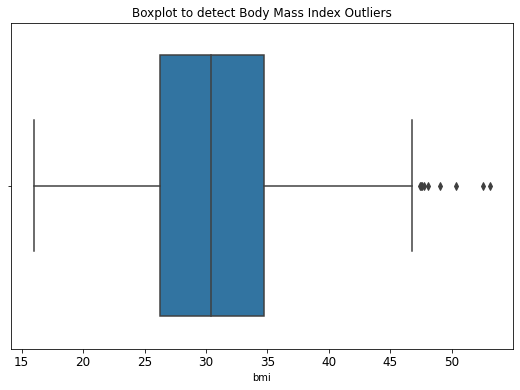

In [6]:
#bmi
plt.figure(figsize=(9,6))
sns.boxplot(x=df['bmi'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplot to detect Body Mass Index Outliers")
plt.show()

There are some outliers in the `bmi` column

In [7]:
#using the tukey's method to handle outliers
#identify the q3,q1,iqr and setting upper threshold
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)

iqr=q3-q1

upper_threshold= q3+1.5*iqr

df.loc[df['bmi']> upper_threshold, 'bmi']=upper_threshold

In [8]:
#checking the summary staistics of the bmi column
df['bmi'].describe()

count    1338.000000
mean       30.650034
std         6.056926
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        47.290000
Name: bmi, dtype: float64

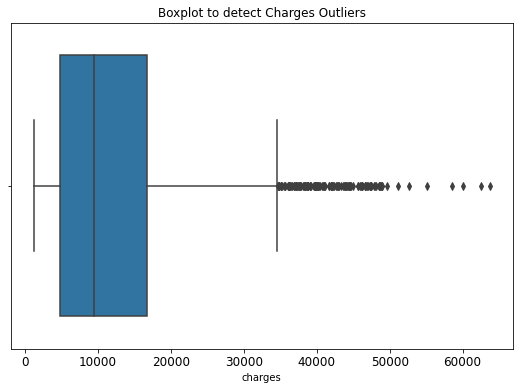

In [9]:
#charges
plt.figure(figsize=(9,6))
sns.boxplot(x=df['charges'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplot to detect Charges Outliers")
plt.show()

*There seem to be outliers in the `charges` column. Some of which are extreme.*

**Using the Tukey's Method to Handle Outliers in the `charges` column**

In [10]:
#identify the q3,q1,iqr and setting upper threshold
q1=df['charges'].quantile(0.25)
q3=df['charges'].quantile(0.75)

iqr=q3-q1

upper_threshold= q3+1.5*iqr

df.loc[df['charges']> upper_threshold, 'charges']=upper_threshold

In [11]:
#checking the summary statistics of the charges column.
df['charges'].describe()

count     1338.000000
mean     12479.369251
std      10158.056096
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      34489.350562
Name: charges, dtype: float64

**EDA and Visualizations**

Distribution of charges

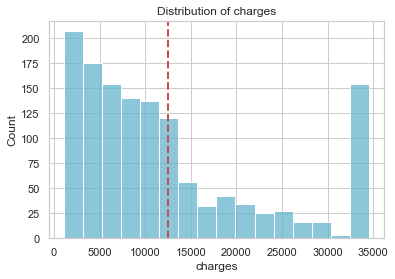

In [12]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df, x="charges",  color='c', ax=ax)

ax.axvline(df["charges"].mean(), color='r', linestyle='--', linewidth=2)

plt.xlabel("charges")
plt.title("Distribution of charges")

plt.show()

The distribution for charges has a mean of about 12500. The distribution is right skewed.

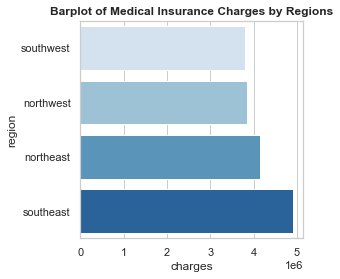

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

fig, ax=plt.subplots(1,1, figsize=(4,4))
ax=sns.barplot(x=charges.head(),y=charges.head().index, palette='Blues')
plt.title("Barplot of Medical Insurance Charges by Regions", fontweight='bold')
plt.show()

The southeast has the highest insurance charges, while the lowest is in the souuthwest.

Lets Visualize if it still holds true for smokers, customers with children, and the sex of the the customer

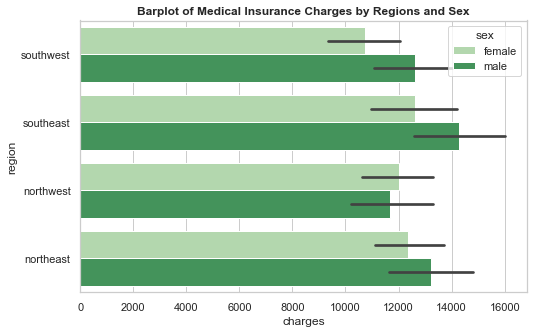

In [14]:
fig, ax=plt.subplots(1,1, figsize = (8,5))
ax=sns.barplot(x="charges", y="region", hue="sex", data=df, palette= "Greens")
plt.title("Barplot of Medical Insurance Charges by Regions and Sex", fontweight='bold')
plt.show()

The Males in the  southeast  has the highest for medical insurance charges.

Active Smoker in all Regions seems to pay more for medical insurance charges. Slightly higher in the south east again. The huge differenc between active and inactive smokers means that it could be a huge predictor for  medical insurance charges

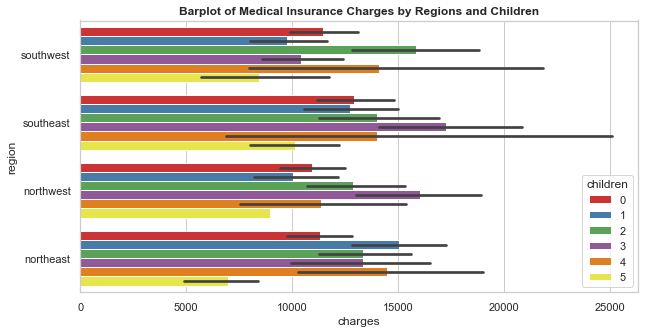

In [15]:
fig, ax=plt.subplots(1,1, figsize = (10,5))
ax=sns.barplot(x="charges", y="region", hue="children", data=df, palette= "Set1")
plt.title("Barplot of Medical Insurance Charges by Regions and Children", fontweight='bold')
plt.show()

_People with children tend to have ea slightly higher medical insurance charges albeit medical insurance for  people with lfewer children are not huge when compared._

**Lmplot** 

Visualize Relationships for the Regression Model

Analysis of the relationships between Charges and Age, BMI and Children with regards to the smoker status

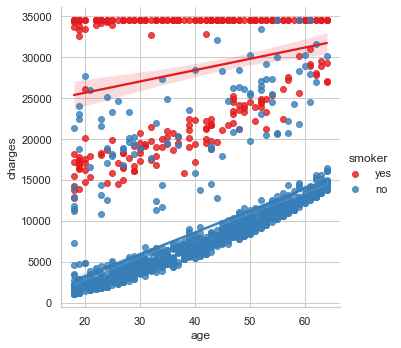

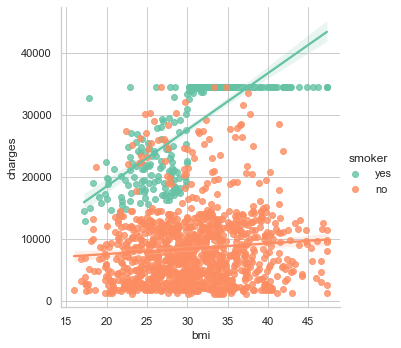

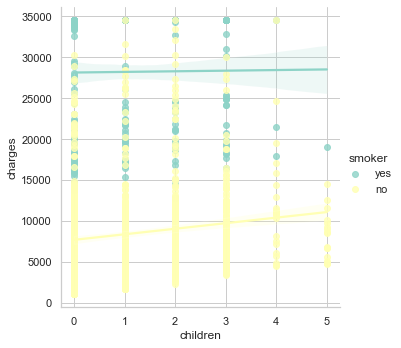

In [16]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

While  age, bmi and children seem to predict medical Insurance cost, Smokers seems to be the major predictor. We would need to  investigate this further and check for the variable coefficients

# **Feature Engineering**

In [17]:
#creating a new column age_group so as to better enhance the performance of our model
bins = [18, 30, 50, 70]
labels = ['Young Adult', 'Adult','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [18]:
#creating a new column: bmi_category
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight


**Encoding Categorical Variables**

*using `OneHotEncoding` to encode `sex`, `smoker`, `region`, `age_group`,`bmi_ategory`*

In [20]:
#get the unique values from the columns
print('Sex:', df['sex'].unique())
print('Smoker:', df['smoker'].unique())
print('Region:', df['region'].unique())
print('Age Group:', df['age_group'].unique())
print('BMI Category:', df['bmi_category'].unique())

Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']
Age Group: ['Young Adult', 'Adult', 'Senior']
Categories (3, object): ['Young Adult' < 'Adult' < 'Senior']
BMI Category: ['Overweight', 'Obese', 'Normal Weight', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal Weight' < 'Overweight' < 'Obese']


In [21]:
# Select the categorical columns for one-hot encoding
categorical_cols = ['sex', 'smoker', 'age_group', 'region', 'bmi_category']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the selected columns
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Assign meaningful column names to the encoded columns
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Drop the original categorical columns from the DataFrame
df_encoded = df.drop(categorical_cols, axis=1).reset_index(drop=True)

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded, encoded_cols], axis=1)

# Print the resulting DataFrame with one-hot encoded variables
df_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,age_group_Adult,age_group_Senior,age_group_Young Adult,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Correlation Analysis**



In [22]:
corr_data=df_encoded[['age','bmi','children','charges','smoker_no', 'smoker_yes',
                     'bmi_category_Normal Weight','bmi_category_Obese','bmi_category_Overweight','bmi_category_Underweight']]
correlation_matrix=corr_data.corr(method='pearson')
print(correlation_matrix)

                                 age       bmi  children   charges  smoker_no  \
age                         1.000000  0.111930  0.042469  0.313394   0.025019   
bmi                         0.111930  1.000000  0.013700  0.160996  -0.003146   
children                    0.042469  0.013700  1.000000  0.073074  -0.007673   
charges                     0.313394  0.160996  0.073074  1.000000  -0.785958   
smoker_no                   0.025019 -0.003146 -0.007673 -0.785958   1.000000   
smoker_yes                 -0.025019  0.003146  0.007673  0.785958  -1.000000   
bmi_category_Normal Weight -0.078098 -0.594161  0.008216 -0.092348  -0.022593   
bmi_category_Obese          0.088600  0.801342  0.007158  0.161496   0.000888   
bmi_category_Overweight    -0.017395 -0.325027 -0.013489 -0.090759   0.021422   
bmi_category_Underweight   -0.060142 -0.266196 -0.004592 -0.044002  -0.013803   

                            smoker_yes  bmi_category_Normal Weight  \
age                          -0.025019

Visualize a Correlation Heatmap of the Data

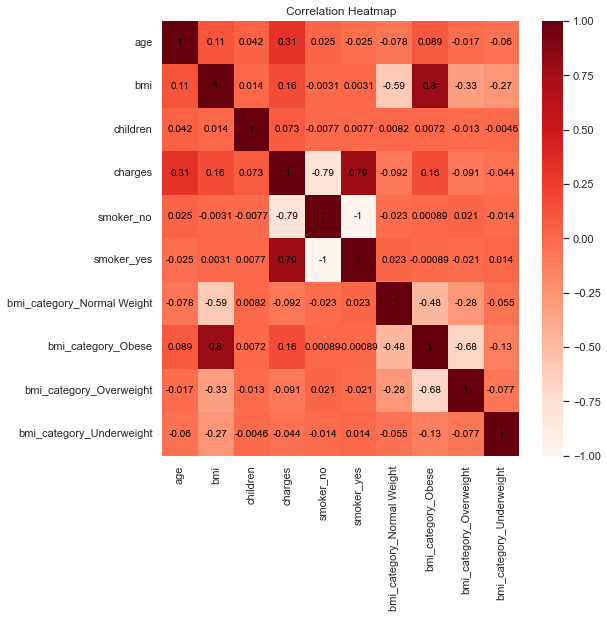

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', annot_kws={'fontsize':10, 'color':'black'})
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows the correlation among Variables

The correlation coefficient of 0.79 between `smoker_yes` and `charges` indicate a strong positive linear relationship. This means that once a person identifies as a smoker, the charges for insurance increases. Also, `smoker_no`suggests a strong negative correlation with `charges`  of -0.79. 

The correlation coefficient of 0.31 between `age` and `charges` suggests a moderate positive linear relationship. This means that as age increases, there is a tendency for charges to increase as well, although the relationship is not extremely strong.

Similarly, the correlation coefficient of 0.16 between `bmi` and `charges` indicates a relatively weak positive linear relationship. This suggests that as BMI (Body Mass Index) increases, there may be a slight tendency for charges to increase as well.Additionally, the `bmi_category_obese` has a correlation coef of 0.8 with `bmi` which shows that it is a high predictor for the `bmi` category albeit relatively a low predictor with `charges` 0.16

same goes for the correlation coefficient of 0.007 for children which suggest that as the number of children increases, there is  a very slight tendancy for charges to increase the relationship is weak

**_Note:_** `we would use smoker_yes,age, and bmi_category_Obese to predict the relationship with medical insurance charges. One of the assumptions of Multiple Linear Regression is that no multicolinearity i.e no two or more independent variables should be highly correlated with each other. Hence, we drop the smoker_no variable`

## **Building the Model**

Drop features that are redundant from the dataset


In [24]:
df_final=df_encoded[['age','bmi_category_Obese','charges', 'smoker_yes']]
df_final.head()

,age,bmi_category_Obese,charges,smoker_yes
0,19,0.0,16884.92400,1.0
1,18,1.0,1725.55230,0.0
2,28,1.0,4449.46200,0.0
3,33,0.0,21984.47061,0.0
4,32,0.0,3866.85520,0.0


Splitting the data into Predictor and Outcome Variables

In [25]:
#independent variable
x= df_final[['age','bmi_category_Obese','smoker_yes']]
#Outcome Variable
y= df_final[['charges']]

splitting the data into training and Testing sets

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

Instantiate the model and fit it to the training data

In [27]:
#fit model to training data
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# **Evaluate Model**

Train Data

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [28]:
#evaluate the model performance on the training data
r_sq=model.score(x_train, y_train)
print("Coefficient of Determination:", r_sq)
y_pred_train=model.predict(x_train)
print("r^2:", r2_score(y_train,y_pred_train))
print("MAE:", mean_absolute_error(y_train,y_pred_train))
print("MSE:", mean_squared_error(y_train,y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train,y_pred_train)))

Coefficient of Determination: 0.7302776799150534
r^2: 0.7302776799150534
MAE: 3455.0682846357336
MSE: 27104942.441985358
RMSE: 5206.240720710613


In [29]:
#evaluate the model performance on the test data
r_sq=model.score(x_test, y_test)
print("Coefficient of Determination:", r_sq)
y_pred_test=model.predict(x_test)
print("r^2:", r2_score(y_test,y_pred_test))
print("MAE:", mean_absolute_error(y_test,y_pred_test))
print("MSE:", mean_squared_error(y_test,y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Coefficient of Determination: 0.7807756034928305
r^2: 0.7807756034928305
MAE: 3253.509613690127
MSE: 23938809.977334164
RMSE: 4892.73031929353


## **Interpretation**

The model's performance on both training and testing sets were pretty good, suggesting that there is no little to no bias in the model. Overall, the test scores, were better.

R_sq(Coefficient of Determination): This tells us how well the model fits the data. i.e, the proportion of variance in the target variable that is explained by the model. The Testing data has an r_sq of 0.78 suggesting that the model could generalize well to new unseen data.

MAE: is a measure of the average absolute error between the predicted values and the actual values. The testing data which is 3254 is lower than the training data. The absolute error is closer to the actual values.

MSE: is a measure of the average squared error between the predicted values and the actual values. A lower MSE indicates that the model is closer to the actual values.

RMSE: is the square root of the mean squared error. It is a measure of the standard deviation of the errors. A lower RMSE indicates that the errors are closer to 0.


**Note**: The mean absolute error is informative here for the purpose of this model and talies with the scale of the target variable which is between $1k - $34k

# **Results**

In [30]:
#create a results dataframe

results=pd.DataFrame(data={"actual": y_test["charges"],
                          "predicted": y_pred_test.ravel()})
results["residual"]= results["actual"] - results["predicted"]

In [31]:
results

,actual,predicted,residual
578,9724.530000,12765.958283,-3041.428283
610,8547.691300,8776.008082,-228.316782
569,34489.350562,31601.573584,2887.776979
1034,12950.071200,14892.827723,-1942.756523
198,9644.252500,9721.283388,-77.030888
...,...,...,...
1261,3277.161000,7094.306443,-3817.145443
494,17942.106000,22412.609195,-4470.503195
97,10226.284200,13474.914763,-3248.630563
418,14418.280400,15601.784203,-1183.503803


## **Visualize Model Results**

*Testing Linear Regression Model Assumptions*

1. **Linearity**

Scatter plot to visualize `Actual` vs `predicted`

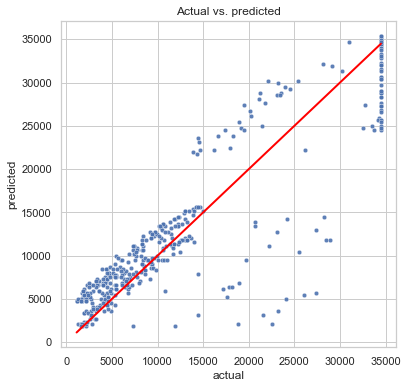

In [32]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.9,
                ax=ax
)
# Add a line representing the ideal relationship
ax.plot([results['actual'].min(), results['actual'].max()],
        [results['actual'].min(), results['actual'].max()],
        color='red',
        linewidth=2)
plt.title('Actual vs. predicted')
plt.show()


Regression Plot to visualize `Actual` vs `predicted`

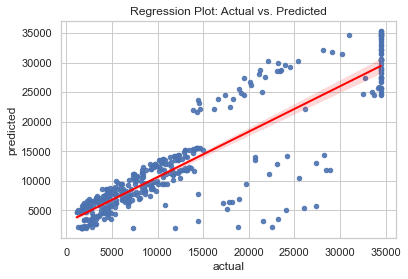

In [33]:
# Create a regression plot to visualize the relationship between 'actual' and 'predicted'
sns.set(style='whitegrid')
sns.regplot(x='actual',
            y='predicted',
            data=results,
            scatter_kws={'s': 20, 'alpha': 0.9},
            line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Regression Plot: Actual vs. Predicted')
plt.show()


The two Visualizations for Linearrity confirms the assumptions of linearity in the model as the data points follows a straight line with some slight deviations in data points.

The shaded region along the regression line is the confidence interval. This represents the uncertainty associated with the regression line and indicates the range within which the true regression line is likely to fall.
The width of the interval represents the level of uncertainty, and a wider interval indicates higher uncertainty. Here, the common level of confidence used is 95%, which means that there is a 95% probability that the true regression line falls within the confidence interval.

Here, the confidence interval is narrow, it suggests that the estimated regression line is precise and reliable. 

2. **Normality**

Visualize the distribution of the residuals using a histogram

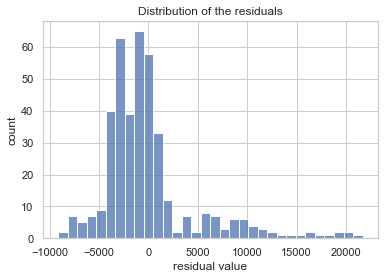

In [34]:
 #Visualize the distribution of the `residuals`

sns.histplot(results['residual'])
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

The assumption of normality holds that the data is normally distributed. This implies that the shape of the distribution is bell shaped and symmetrical. Here, the distribution of residuals is bell shaped and symmetrical along the mean . However, it is slightly right skewed. While this assumption holds, we might need to investigate further, the right-skewdness of the data.
However, given the context of our model being in the insurance world, the active smokers and Obese people are the highest influencers of insurance charges. Thus, the distribution is right-skewed 

In [35]:
results['residual'].mean()


-49.69748658231985

The distribution of residuals has a mean of about -49.69748. The residual explains the variance in the outcome variable that is not explained by the model.  A normal distribution of around 0 is good. Given the magnitude of the target variable, a residual mean of -0.49 is negligible.

3. **Homoscedasticity**

scatterplot of residuals over predicted.

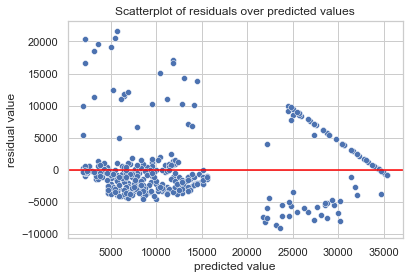

In [36]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The assumption holds for Homoscedasticity as the data points form a random cloud an are evenly distributed between the Horizontal line

### Coefficients
Use the coef_ attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model.



In [37]:
# Get model coefficients
coefficients = pd.DataFrame(model.coef_, columns=x.columns)
coefficients

,age,bmi_category_Obese,smoker_yes
0,236.318827,2808.356068,19780.890607


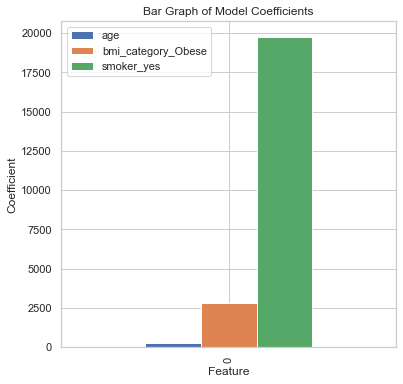

In [38]:
# Plot the coefficients
coefficients.plot.bar(figsize=(6, 6))
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Bar Graph of Model Coefficients")
plt.show()

Smoker yes is the highest predictor of charges followed by bmi Obese and Age

**Intercept**

In [39]:
model.intercept_

array([-2330.97677186])

When the indeppendent variables are =0, charges decrease by  an average of -$2330

## **Insights and Conclusion**

Importance of Age: The coefficient of the 'age' variable in the  Model is 236.318827. This indicates that age has a positive impact on insurance charges. As age increases, there is a tendency for insurance charges to increase as well. Stakeholders can use this information to understand the age-related factors that contribute to higher charges and develop targeted strategies for different age groups. Therefore, the model predicts that insurance will increase by $236 for every year of age.

Influence of BMI Category: The coefficient of the 'bmi_category_Obese' variable in the Model is 2808.356068. This suggests that individuals classified as 'Obese' in terms of BMI tend to have higher insurance charges. Stakeholders can focus on addressing the healthcare needs of this group and promoting preventive measures to manage weight and reduce the associated healthcare costs. Thus, the model predicts that insurance will increase by $2808 for every Obesed person.

Impact of Smoking: The coefficient of the 'smoker_yes' variable in the Model is 19780.890607. This indicates that smokers tend to have significantly higher insurance charges compared to non-smokers. Stakeholders can emphasize the importance of smoking cessation programs, health education, and awareness campaigns to reduce smoking rates and mitigate the financial burden associated with smoking-related healthcare costs. Therefore, the model predicts that insurance will increase by $19780 for every smoker.

Residual Analysis: The residual mean of -49.69748658231985 indicates that, on average, the model tends to underestimate the charges by an average of  $49.70. Stakeholders should be aware of this slight bias and consider it when making decisions based on the predicted charges. It may be necessary to further investigate the factors contributing to this bias and make adjustments if necessary.

Model Performance: The coefficient of determination (R-squared) for the training and testing data is 0.7302776799150534 and 0.7807756034928305, respectively. These values indicate that the model explains approximately 73% to 78% of the variance in the insurance charges. Stakeholders can use this information to assess the model's predictive capability and make informed decisions based on the predicted charges.

The mean absolute error (MAE) of the model is 3455.0682846357336 on the training data and 3253.509613690127 on the test data. This means that the model is on average about $3455 off on the training data and $3253 off on the test data.

The root mean squared error (RMSE) of the model is 5206.240720710613 on the training data and 4892.73031929353 on the test data. This means that the standard deviation of the model's errors is about $5206 on the training data  and $4892 on the test data.


### **Limitations**

The model does not take into account all of the factors that affect insurance charges. For example, the model does not take into account the patient's medical history, the type of insurance plan.
The model is trained on a limited dataset. This means that the model may not be able to generalize to new data.
The model is not perfect. The model will make mistakes, and the errors may be significant.
Despite these limitations, the model can still be a useful tool for making decisions about insurance charges. However, it is important to be aware of the limitations of the model and to use it with caution.

# **Polynomial Regression**

Given How the model has performed using a multiple Linear Regression, we could use a Polynomial Regression to see how well the model fits and perform and which performs better of the Two.
Since there are some variations in the linearity chart, and how right skewed the the residual distribution turned out

In [40]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)  
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

#lets use a  degree of 2 polynomial features to allow the model to capture both linear and quadratic relationships between 
#the independent variables and the target variable. since the first model exhibit linear and nonlinear relationships

In [43]:
# Create an instance of the polynomial regression model
model = LinearRegression()

In [44]:
# Train the polynomial regression model
model.fit(x_train_poly, y_train)


LinearRegression()

In [45]:
# Make predictions on the testing data
y_pred_test = model.predict(x_test_poly)

In [46]:
#mke predictions on the training data
y_pred_train = model.predict(x_train_poly)

**Evaluate Model**

In [47]:
# Evaluate the performance of the model on train data
r2 = r2_score(y_train, y_pred_train)
print("R-squared:", r2)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R-squared: 0.8057723748297578
MAE: 2481.1240543705762
MSE: 19518327.58677482
RMSE: 4417.955136346997


In [48]:
# Evaluate the performance of the model on test data
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R-squared: 0.8428991707766261
MAE: 2385.7272010268916
MSE: 17155056.453477252
RMSE: 4141.866300772787


**Interpretation**

The model's performance on both training and testing sets were pretty good, suggesting that there is little to no bias in the model. Overall, the test scores, were better. The training had an r_sq of 0.80

R_sq(Coefficient of Determination): This tells us how well the model fits the data. i.e, the proportion of variance in the target variable that is explained by the model. The Testing data has an r_sq of 0.84 suggesting that the model could generalize well to new unseen data.

**Results**

In [49]:
#create a results dataframe

results= pd.DataFrame(data={"actual": y_test['charges'],
                           "predicted":y_pred_test.ravel()})

results["residual"]= results["actual"]  -  results["predicted"]
results.head()

,actual,predicted,residual
578,9724.530000,11573.871142,-1849.341142
610,8547.691300,10575.222693,-2027.531393
569,34489.350562,35025.984247,-536.633685
1034,12950.071200,14393.042259,-1442.971059
198,9644.252500,11958.544610,-2314.292110


### **Visualize Model Results**

Testing polynomial regression Assumptions

**1. Linearity or curvilinearity**

Lets create a `scatterplot` or `regplot` to visualize this assumption

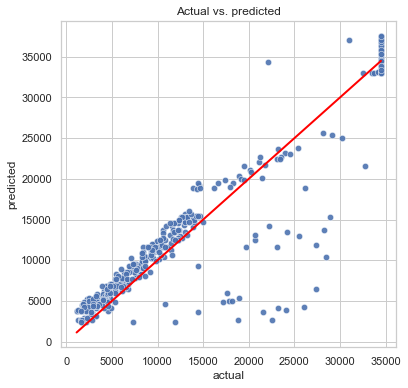

In [50]:
sns.set(style='whitegrid')
fig, ax =plt.subplots(figsize=(6,6))
sns.scatterplot(x=results['actual'],
               y=results['predicted'],
               s=40,
               alpha=0.9,
               ax=ax)
# Add a line representing the ideal relationship
ax.plot([results['actual'].min(), results['actual'].max()],
        [results['actual'].min(), results['actual'].max()],
        color='red',
        linewidth=2)
plt.title('Actual vs. predicted')
plt.show()


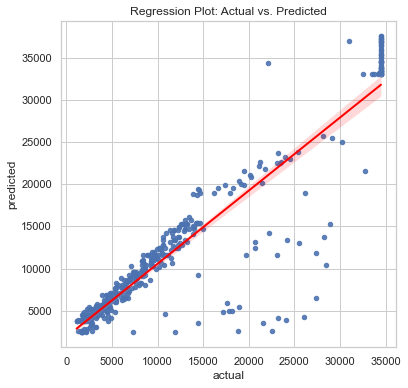

In [51]:
plt.figure(figsize=(6,6))
sns.regplot(x="actual",
           y="predicted",
           data=results,
           scatter_kws={'s':20,
                       'alpha': 0.9},
           line_kws={'color':'red',
                    'linewidth':2})


plt.title('Regression Plot: Actual vs. Predicted')
plt.show()

Both the scatterplot and the regplot holds the assumption of linearity for the model. A confidence level of 95% is assumed.
The confidence interval is narrow, meaning that there is a 95% probability thst the true regression line falls between the confidence interval.

**2.Independent Variables**

The Values in the data are independent of each other. Thus assumption is held.

**3. No Influential Outliers**

The Outliers in the data has been handled.

**4. Normality**

lets Create a `Histogram` to visualize the distribution of residuals

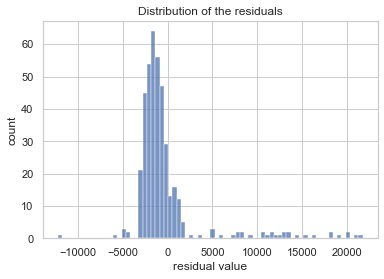

In [52]:
sns.histplot(results['residual'])
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

The normality assumption has been held here as the bars are bell shaped and symmtrical along the mean although a little bit right skewed however this is negligible

In [53]:
results['residual'].mean()

-239.38414382172456

The distribution of residuals has a mean of about -239.39414. The residual explains the variance in the outcome variable that is not explained by the model. A normal distribution of around 0 is good. Given the magnitude of the target variable, a residual mean of -0.239 is negligible albeit higher than the first(linear regression)model.

**5. Homoscedasticity**

lets create aa scatter plot of `residuals` over `predicted`

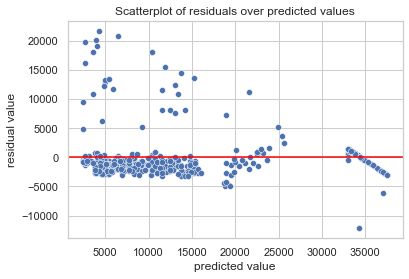

In [54]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The assumption of this model, does not quite hold to a large extent, as the variability of the residuals are not randomly scattered accross all the levels of the independent variable. 

This pattern above almost has  heteroscedasticity rather than homoscedasticity.

For the purpose of this project, we shall proceed with the analysis as this is synonymous with a real world data.

In [55]:
# Interpret the coefficients 
coefficients = model.coef_
intercept = model.intercept_

#get the feature names
feature_names = ['intercept','age', 'bmi_Obese', 'smoker_yes', 'age^2', 'age * bmi_Obese', 'age * smoker_yes', 'bmi_Obese^2', 'bmi_Obese * smoker_yes', 'smoker_yes^2']


#converting the coeficients to dataframe
coefficients = pd.DataFrame(model.coef_, columns=feature_names)
coefficients['intercept']=intercept
coefficients

,intercept,age,bmi_Obese,smoker_yes,age^2,age * bmi_Obese,age * smoker_yes,bmi_Obese^2,bmi_Obese * smoker_yes,smoker_yes^2
0,-980.88872,153.758611,1241.536216,9546.070039,1.959917,-61.987999,-153.309502,1241.536216,12869.878365,9546.070039


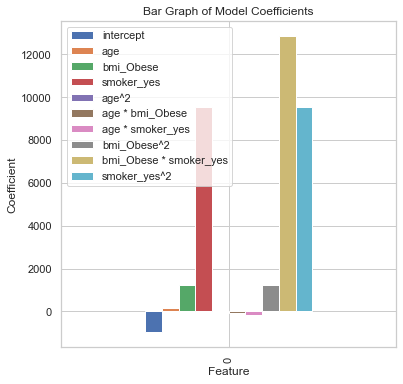

In [56]:
# Plot the coefficients
coefficients.plot.bar(figsize=(6, 6))
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Bar Graph of Model Coefficients")
plt.show()

## **Insights and Conclusion**

The polynomial regression model shows promising results in predicting insurance charges based on the provided features. Here are the key insights and conclusions based on the analysis:

Model Performance:

The polynomial regression model achieved a higher R-squared value on both the training (0.8058) and testing (0.8429) datasets compared to the multiple linear regression model.
This indicates that the polynomial regression model explains a larger proportion of the variance in the insurance charges and performs better in predicting the charges.
Feature Importance:

The model coefficients provide insights into the impact of each feature on the insurance charges.
Age, BMI (in the Obese category), and smoking status (Yes) are significant factors influencing higher insurance charges.
The squared terms and interaction terms further capture non-linear relationships between the features and the charges.

Model Interpretation:

The intercept of -980.8887 represents the estimated charges when all the features are zero.
Positive coefficients indicate an increase in charges, while negative coefficients suggest a decrease in charges for each corresponding feature.
For example, for every year increase in age, the charges increase by approximately $153.76.









**Limitations**

The polynomial regression model may be more accurate, but it is not clear that the increase in accuracy is worth the decrease in interpretability. In addition,given the complex natire of insurance data, the polynomial regression model is more likely to overfit the data, which means that it may not generalize well to new data.

**Recommendations:**

Considering the higher performance of the polynomial regression model, it is recommended to use this model for future predictions of insurance charges.
Stakeholders should focus on age, BMI (Obese category), and smoking status as key factors when assessing insurance charges.
Further investigation can be done to explore other potential factors or interactions that may influence insurance charges.
In conclusion, the polynomial regression model demonstrates improved performance in predicting insurance charges compared to the multiple linear regression model. By considering age, BMI (Obese category), and smoking status, stakeholders can make more accurate estimations of insurance charges. This information can be utilized to inform decision-making processes and optimize strategies related to insurance pricing and risk assessment.

While the polynomial regression model introduces some additional complexity with higher-order terms and interactions, it can provide valuable insights into the underlying relationships and interactions between the features and charges.